<a href="https://colab.research.google.com/github/nurpurwanto/EDM-FINPRO-ECOMMERCE-SHIPPING/blob/main/STAGE_1_EDA_TOKOTRONIC_TIM_ENTERPRISE_DATA_MANAGEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Stage 1
#Kelompok EDM​

Anggota:

1. Arbi Indrawan​
2. Syafira Rizka Kurniawati​
3. Irena Chandra​
4. Denilson Pasaribu​
5. Intan Furqona T​
6. Elprida Agustina​
7. Nur Purwanto​
8. Arif Ibrahim​ 

**An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.**

**Data Description**

**ID**: ID Number of Customers.

**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product**: Cost of the Product in US Dollars.

**Prior purchases**: The Number of Prior Purchase.

**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**Gender**: Male and Female.

**Discount offered**: Discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


[Source Dataset](https://www.kaggle.com/datasets/prachi13/customer-analytics?select=Train.csv)

#Import Library

In [ ]:
#Lib for dataframe, agg, and data viz
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 0
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
from textwrap import wrap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#lib for preprocessing
# Library for Scalling Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
import warnings
# Library for Split Data
from sklearn.model_selection import train_test_split
# Library for Z-Score
from scipy import stats

# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## Load Data Frame

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('Train.csv')
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2804,2805,A,Ship,4,2,222,2,medium,F,16,2518,1
7243,7244,F,Road,4,4,190,2,low,M,2,4460,0
7404,7405,D,Flight,4,1,228,5,low,F,6,1727,1
5424,5425,D,Ship,4,1,229,4,low,F,3,4352,1
2593,2594,F,Road,3,2,140,3,low,F,42,1465,1


#Stage 1 Exploratory Data Analytics (EDA)

## Descriptive Statistics

### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

In [ ]:
df["Reached.on.Time_Y.N"]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Customer_rating dan Reached.on.Time_Y.N merupakan data Categorical , perlu di ubah type ke Object

### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [ ]:
df.isnull().all()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak terdapat missing value pada data.

## Seperating Numerical & Categorical Columns

In [ ]:
# kebutuhan univariate & bivariate
df_analysis=df.drop("ID", axis='columns')

#ubah type data Customer_rating & Reached.on.Time_Y.N to Object
df_numerical_a = df_analysis.select_dtypes(exclude='object')
df_categorical_a = df_analysis.select_dtypes(include='object')

numerical_a = df_numerical_a.columns.values
categorical_a = df_categorical_a.columns.values

In [ ]:

df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [ ]:
numerical = df_numerical.columns.values
categorical = df_categorical.columns.values

### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Pada kolom Discount_offered nilai mean (13,37) memiliki perbedaan yang besar dengan nilai mediannya (median=7). Nilai maksimum dan minimumnya juga memiliki perbedaan yang sangat jauh, yakni min=1 dan maks = 65. Dari data statistik yang ditunjukkan, kolom **Discount_offered positively skewed distribution**.

## Univariate Analysis

### Pengecekan Berapa Banyak Pesanan Terlambat

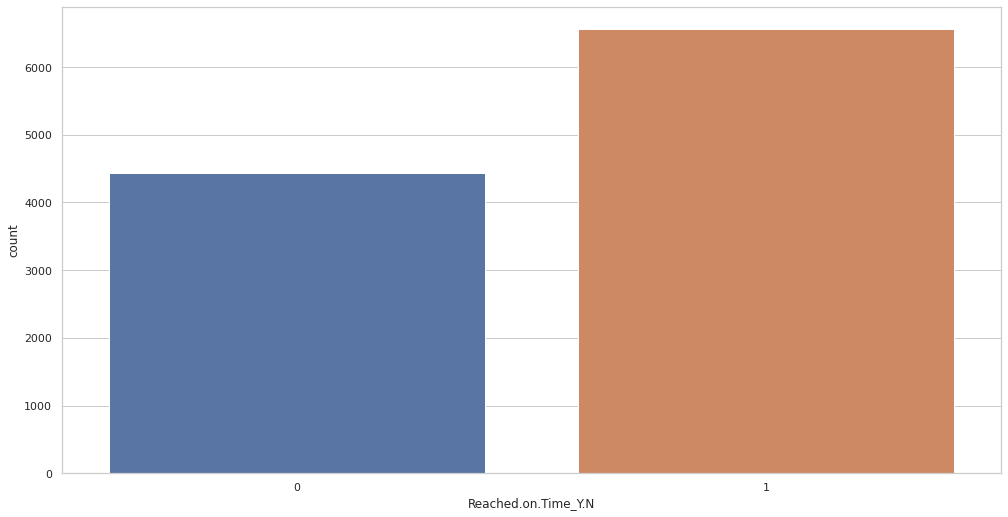

In [ ]:
plt.figure(figsize= (15,8))
sns.countplot(data=df_analysis, x='Reached.on.Time_Y.N')

Tidak ada nilai yang kosong pada setiap kolom

In [ ]:
df_analysis['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

Visualisasi countplot menunjukkan 60% dari total pesanan tidak terkirim tepat waktu kepada pelanggan.

### Individual Boxplots

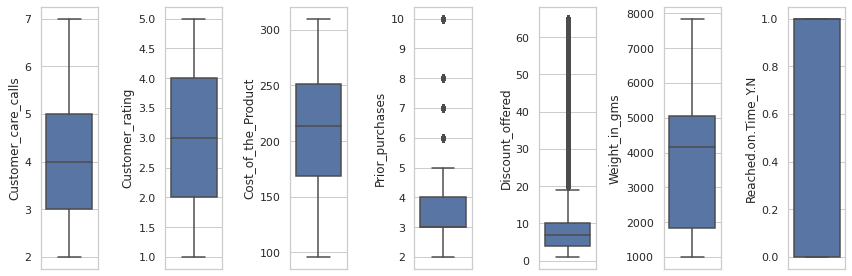

In [ ]:
for i in range(0, len(numerical_a)):
    plt.subplot(1, len(numerical_a), i+1)
    sns.boxplot(y=df_analysis[numerical_a[i]], orient='v')
    plt.tight_layout()

Pada setiap variabel(Column), ada dua yang mempunyai outlier yakni kolom Prior_purchases dan Discount_offered.

> 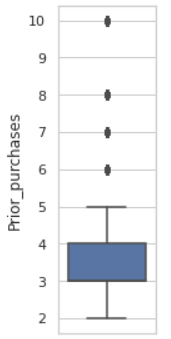

Untuk kolom Prior_purchases bisa kita lihat bahwa nilai Q2 berada di nilai(value) antar 3 dan 4. untuk batas Q3 berada pada nilai 5. Di atas nilai tersebut bisa kita sebut outlier.

> 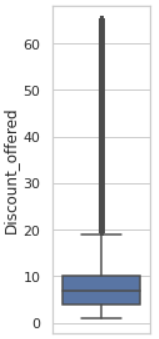





Untuk kolom Discount_offered Q2 berada pada nilai dibawah 10. Q3 berada pada nilai 20. Di atas nilai tersebut bisa dikatakan data yang outlier.

### Individual Distplot

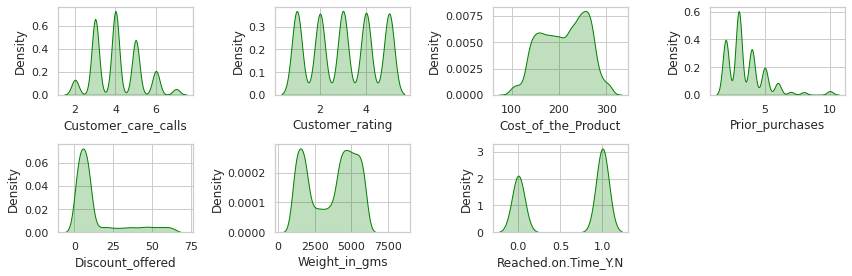

In [ ]:
for i in range(0, len(numerical_a)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df_analysis[numerical_a[i]], color='green', shade=True)
    plt.xlabel(numerical_a[i])
    plt.tight_layout()

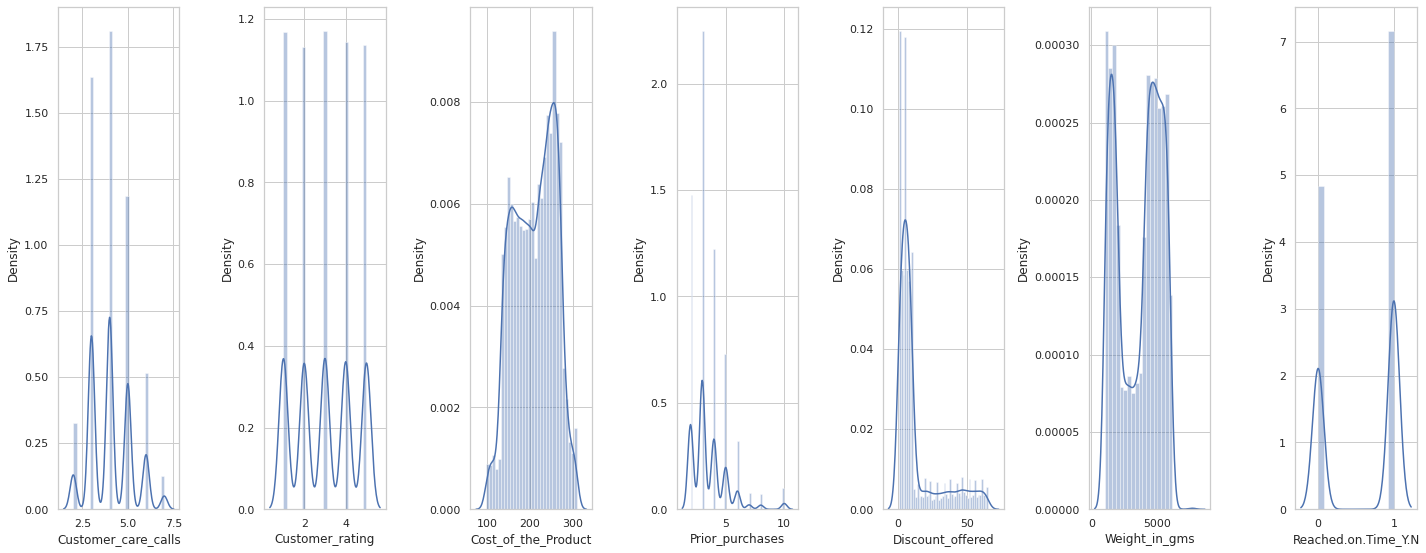

In [ ]:
plt.figure(figsize=(20,15))
for i in range(0, len(numerical_a)):
    plt.subplot(2, len(numerical_a), i+1)
    sns.distplot(df_analysis[numerical_a[i]])
    plt.tight_layout()

*Bentuk distribusi setiap variabel :*
* Customer_care_calls : **normal**
* Customer_rating : **normal**
* Cost_of_the_Product : **bimodal**
* Prior_purhcases : **negatively skewed**
* Discount_offered : **negatively skewed**
* Weight_in_gms : **bimodal**

*Terdapat lonjakan distribusi pada variabel:*
* Cost_of_the_Product
* Weight_in_gms

### Individual Countplot

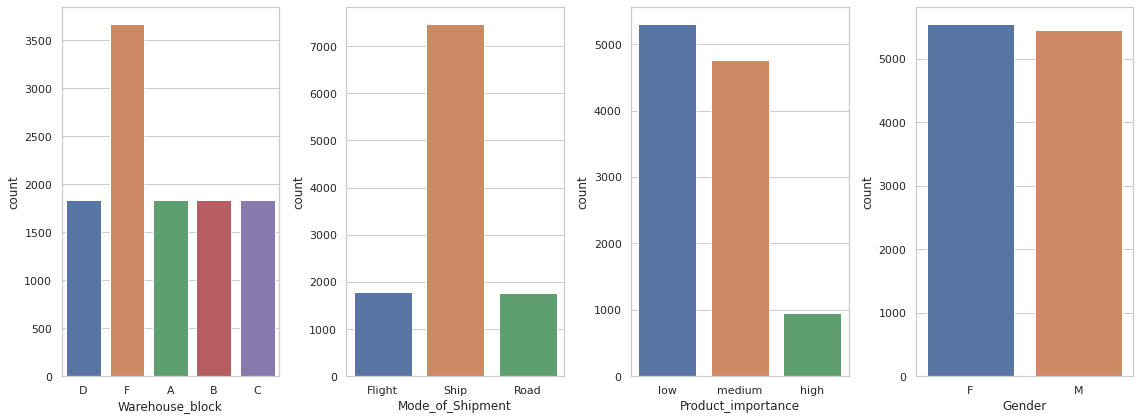

In [ ]:
plt.figure(figsize=(16,6))
for i in range(0, len(categorical_a)):
    plt.subplot(1, len(categorical_a), i+1)
    sns.countplot(x=df_analysis[categorical_a[i]], orient='h')
    plt.tight_layout()

Dari plot di atas, terlihat bahwa dari variabel:
* Warehouse_block : Block F merupakan warehouse yang jumlah barangnya paling banyak dibandingkan block lainnya
* Mode_of_Shipment : Ship merupakan moda pengiriman yang paling banyak digunakan dibandingkan moda lainnya
* Product_importance : Kategori low dan medium memiliki nilai yang hampir sama, berbanding terbalik dengan kategori high yang cukup rendah jumlahnya
* Gender : Gender memiliki nilai yang hampir sama antara Female dan Male
* Reached.on.Time_Y.N : Produk yang reached on time hanya sebesar 40%, sedangkan 60% not reached on time

Untuk variabel Mode_of_Shipment dan Product_Impotance jika hanya dilihat dari grafik tersebut terlihat ada ketimpangan pada setiap nilai pada variabel. Untuk menentukan normalitas datanya perlu ada uji lainnya untuk membuktikan.

##Bivariate Analysis



### Delays in delivery compared to discount

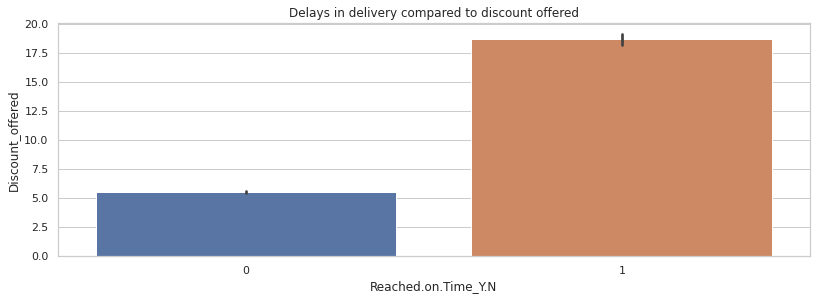

In [ ]:
plt.title('Delays in delivery compared to discount offered')
g = sns.barplot(x='Reached.on.Time_Y.N',y='Discount_offered', data=df_analysis)

findings: 

Dari visualisasi di atas, semakin besar diskon yang diberikan ketibaan barang semakin tidak tepat waktu The higher the discount is offered, the more likely that the delivery is not on time.

Jadi, keterlambatan efektifitas pengiriman barang sangat dipengaruhi oleh diskon yg diberikan

1 = yes, delay occurred 


0 = no, delay not occurred

### Number of customer care calls compared to discount offered 



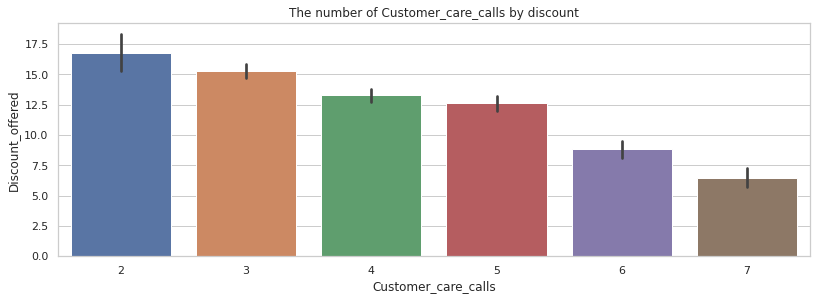

In [ ]:
plt.title('The number of Customer_care_calls by discount')
g = sns.barplot(x='Customer_care_calls',y='Discount_offered', data=df_numerical_a)

Deskripsi/finding: 

The higher the discount the less likely customers to call. Feature `Customer care calls` konsisten menurun seiring dengan bertambahnya feature `Discount`. Walaupun barang dengan `Discount` tinggi rentan mengalami keterlambatan ketibaan barang, pelanggan tidak akan sering menghubungi layanan custumer care karena sudah cukup puas dengan diskon yang besar. 

Maka, tidak ada korelasi langsung customer care calls terhadap estimasi ketibaan barang.

### The number of calls compared to product cost


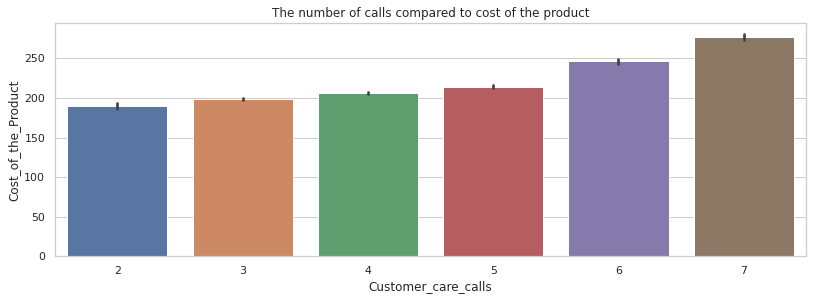

In [ ]:
plt.title('The number of calls compared to cost of the product')
g = sns.barplot(x='Customer_care_calls',y='Cost_of_the_Product', data=df_analysis)

finding:

The number of callings made by customers increases consistently with the price of the product.

Jadi, dapat disimpulkan bahwa semakin mahal harga produk nya pelanggan semakin sering menghubungi customer care. Jumlah panggilan customer care dari pelanggan meningkat secara konsisten dengan feature cost of the product (harga). 

Jumlah panggilan customer care calls lebih dipengaruhi oleh harga barang yang mahal dibandingkan dengan diskon maupun terlambatnya barang. 



In [ ]:
df_categorical_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Warehouse_block     10999 non-null  object
 1   Mode_of_Shipment    10999 non-null  object
 2   Product_importance  10999 non-null  object
 3   Gender              10999 non-null  object
dtypes: object(4)
memory usage: 343.8+ KB


#Multivariate Analysis

##Heatmap Correlation   *note : heatmap hanya untuk mendeteksi multicollinearity 

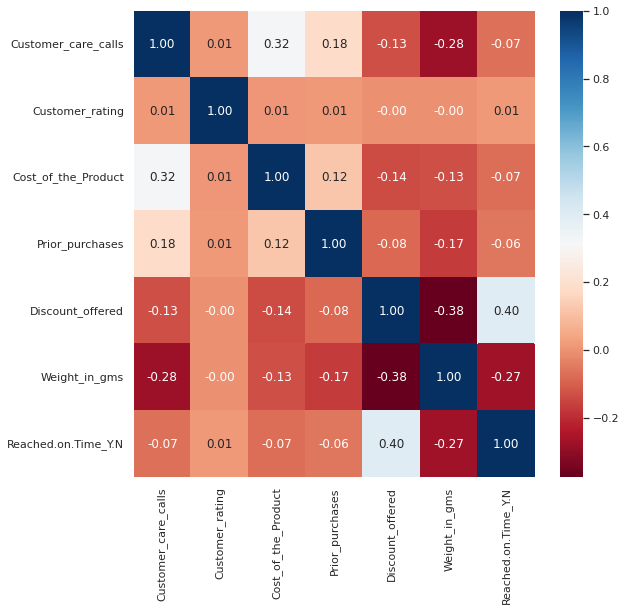

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_analysis.corr(), cmap='RdBu', annot=True,fmt='.2f')

KORELASI NEGATIF *  

 ​
- Korelasi negatif sebesar -0.38 antara feature `Discount_offered` dengan `Weight`tetapi korelasinya bersifat negatif. Artinya diskon diberikan kepada barang2 yang ringan. ​

- Korelasi negatif sebesar -0.28 antara fitur Weight_in_gms dengan Customer_care_calls. Artinya komplain yang diterima adalah dari customer yang membeli barang-barang yang ringan. (Asumsi: ketakutan barang nyangkut). ​

- Korelasi negatif sebesar - 0.17 antara fitur Weight_in_gms dengan Prior_purchases . Artinya semakin ringan barang, semakin banyak barang yang dibeli bersamaan. ​

- Korelasi negatif sebesar -0.14 antara fitur Discount_offered dengan Cost_of_the_product. Artinya semakin besar diskon, semakin murah harganya. (make sense) ​

- Korelasi negatif sebesar -0.13 antara fitur Discount_offered dengan Customer_care_calls. Artinya semakin besar diskon, semakin sedikit komplain. ​

- Korelasi negatif sebesar -0.13 antara fitur Weight_in_gms dengan Cost_of_products. Artinya semakin berat barangnya, semakin murah harganya. 

KORELASI POSITIF ​



- Korelasi positif sebesar 0.32 antara fitur Customer_care_calls dengan Cost_of_the_product. Artinya semakin besar harga barang, semakin banyak telepon komplain yang diterima.​

- Korelasi positif sebesar 0.18 antara fitur Prior_purchases dengan Customer_care_calls. Artinya semakin banyak pembelian, semakin banyak telepon komplain yang diterima. (Asumsi: keresahan barang tidak sampai bersamaan).​

- Korelasi positif sebesar 0.12 antara fitur Prior_purchases dengan Cost_of_products. Artinya semakin banyak pembelian, semakin besar harganya (make sense).​



Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
feature weight in grams dan discount offered

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
korelasi negatif:
semakin rendah beban barang yang dikirim maka barang yang akan dikirim akan tepat waktu atau semakin berat barang yang dikirim maka barang yang dikirim akan tidak tepat waktu.


Korelasi adalah nilai yang menunjukkan kuat atau tidaknya hubungan linier antar dua variabel. Berdasarkan heatmap dapat dijelaskan bahwa feature yang memiliki pengaruh positif terhadap feature reached on time adalah discount offered dengan nilai 0,40, dimana dapat nilai tersebut tergolong dalam korelasi yang cukup. sedangkan korelasi yang memiliki hubungan negatif adalah "weight_in_gms" dimana nilainya 0,27 dimana nilai tersebut tergolong dalam korelasi yang cukup.

### Pair Plots + Hue [Reached.on.Time_Y.N]

<Figure size 1080x1080 with 0 Axes>

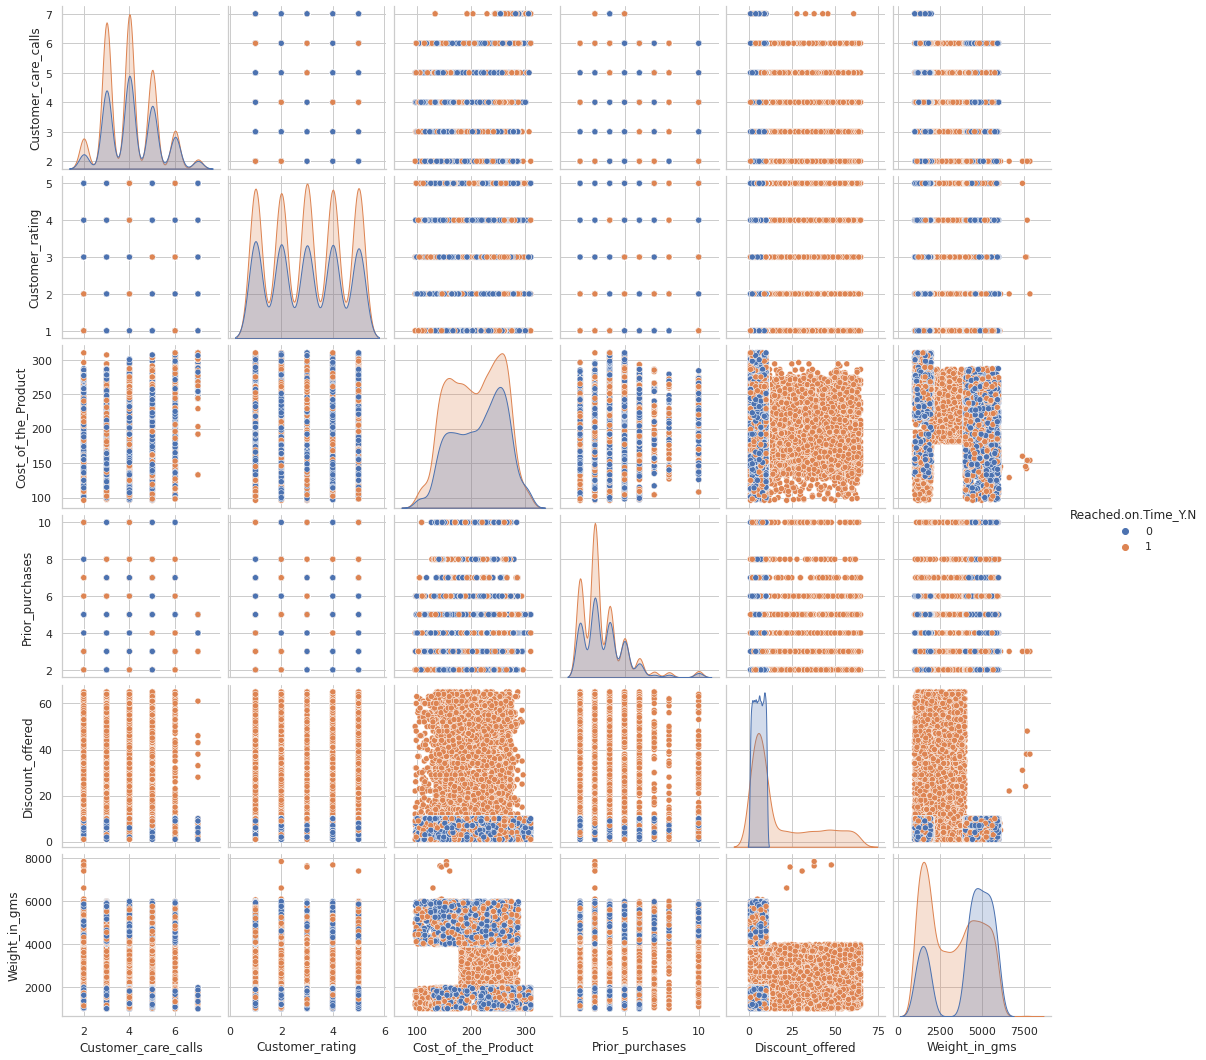

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_analysis, diag_kind='kde', hue='Reached.on.Time_Y.N')
plt.savefig('pair plots hue.jpg')

Apakah ada scatter plot dimana kedua warna terpisah dengan baik?

Dari beberapa plots di atas terlihat bahwa bebarapa plots pemisahan kedua warna cukup terpisah dengan baik namun masih ada penumpukan diantara kedua warna tersebut. Salah satu diantaranya adalah plots antara feature `Cost_of_the_product` dengan `Weight` dan feature `Cost_of_the_Product` dengan `Discount_offered` dan `Discount_offered` dengan `Weight`


Dari beberapa plot di atas diketahui bahwa `Discount_offered` dan `Weight` memiliki pengaruh paling besar terhadap estimasi ketibaan barang

Pada scatter plot atau pair plot ini dapat dipahami  bahwa:​

- Costumer rating tidak memiliki pola terhadap feature numerik yang ada.​

- Terhadap barang dengan berat 2000-4000 gram serta diskon lebih besar dari 10% pengiriman tidak tepat waktu.​
- Terhadap barang dengan berat 2000-4000 gram dan harga ~$180 - ~$280 pengiriman tidak tepat waktu.​
​

### Category Plots

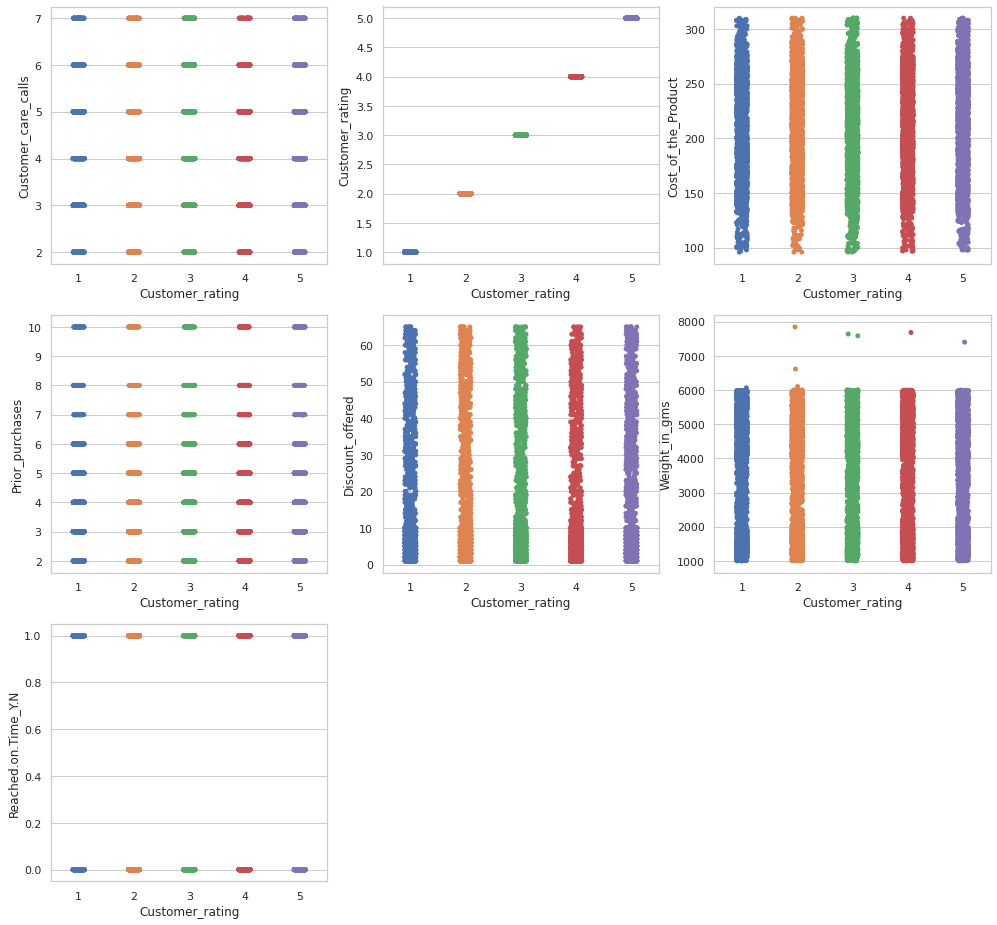

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical_a)): #setiap kolom numerik
  ax = fig.add_subplot(3,3,i+1) #set posisi catplot/stripplot pada layout
  sns.stripplot(ax=ax, data=df_analysis, x='Customer_rating', y=numerical_a[i]) #gambar catplot/stripplot 

Pada category plot tersebut dapat dipahami bahwa:



Tidak ada keterkaitan atau tidak terbentuk pola antara customer rating terhadap fitur numerical pada dataset.​

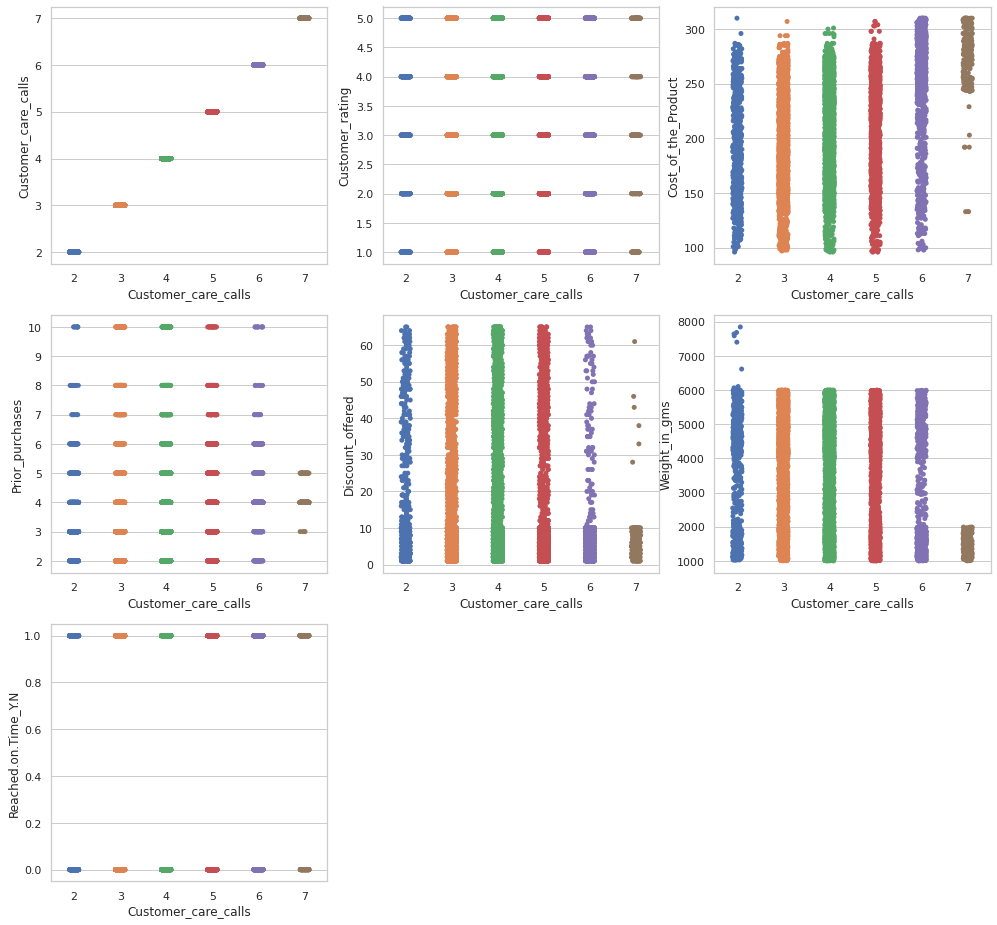

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical_a)): #setiap kolom numerik
  ax = fig.add_subplot(3,3,i+1) #set posisi catplot/stripplot pada layout
  sns.stripplot(ax=ax, data=df_analysis, x='Customer_care_calls', y=numerical_a[i]) #gambar catplot/stripplot 

Pada category plot tersebut dapat dipahami bahwa:​
​

Fitur yang mempengaruhi atau memiliki pola terhadap frekuensi customer care calls adalah fitur (+)cost of the product, (+) prior purchases, (-) discount offered, dan (-) weight in grams.​

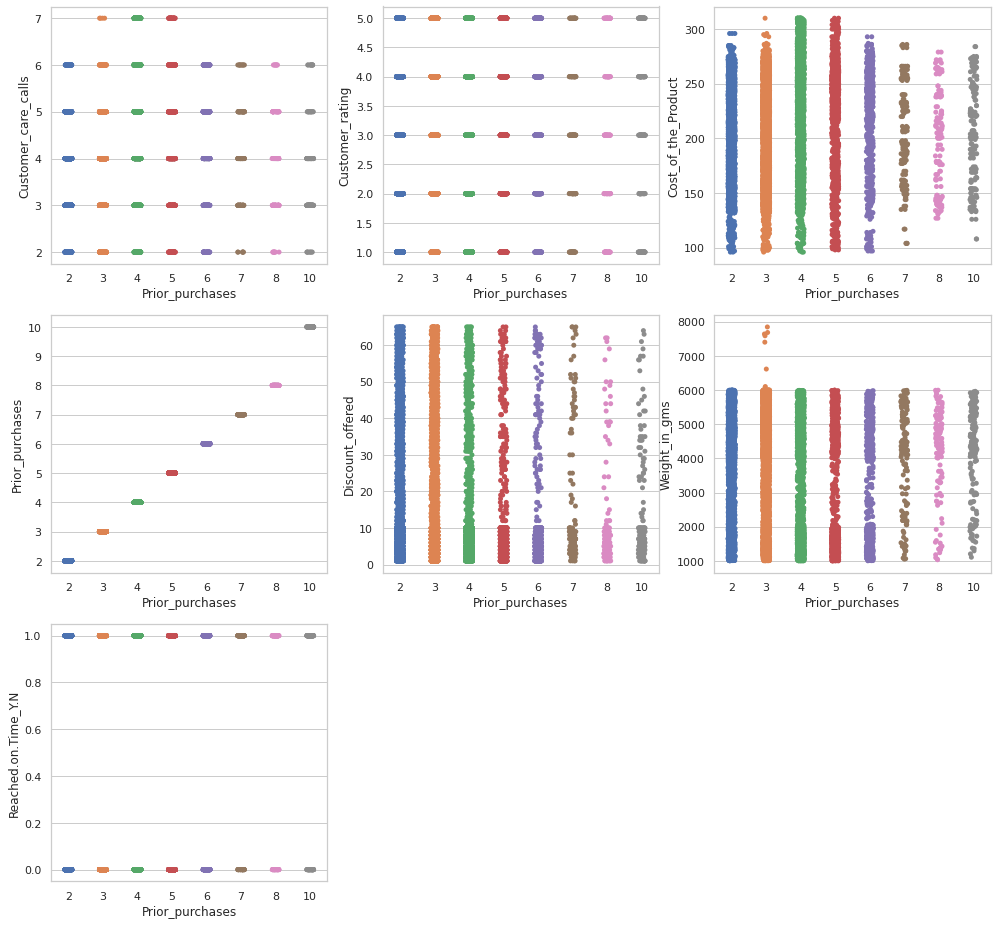

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical_a)): #setiap kolom numerik
  ax = fig.add_subplot(3,3,i+1) #set posisi catplot/stripplot pada layout
  sns.stripplot(ax=ax, data=df_analysis, x='Prior_purchases', y=numerical_a[i]) #gambar catplot/stripplot 

Pada category plot tersebut dapat dipahami bahwa:​
​

Fitur yang mempengaruhi atau memiliki pola terhadap prior purchases adalah (+)cost of theproduct, (-) discount offered, dan (+) weight in grams.​

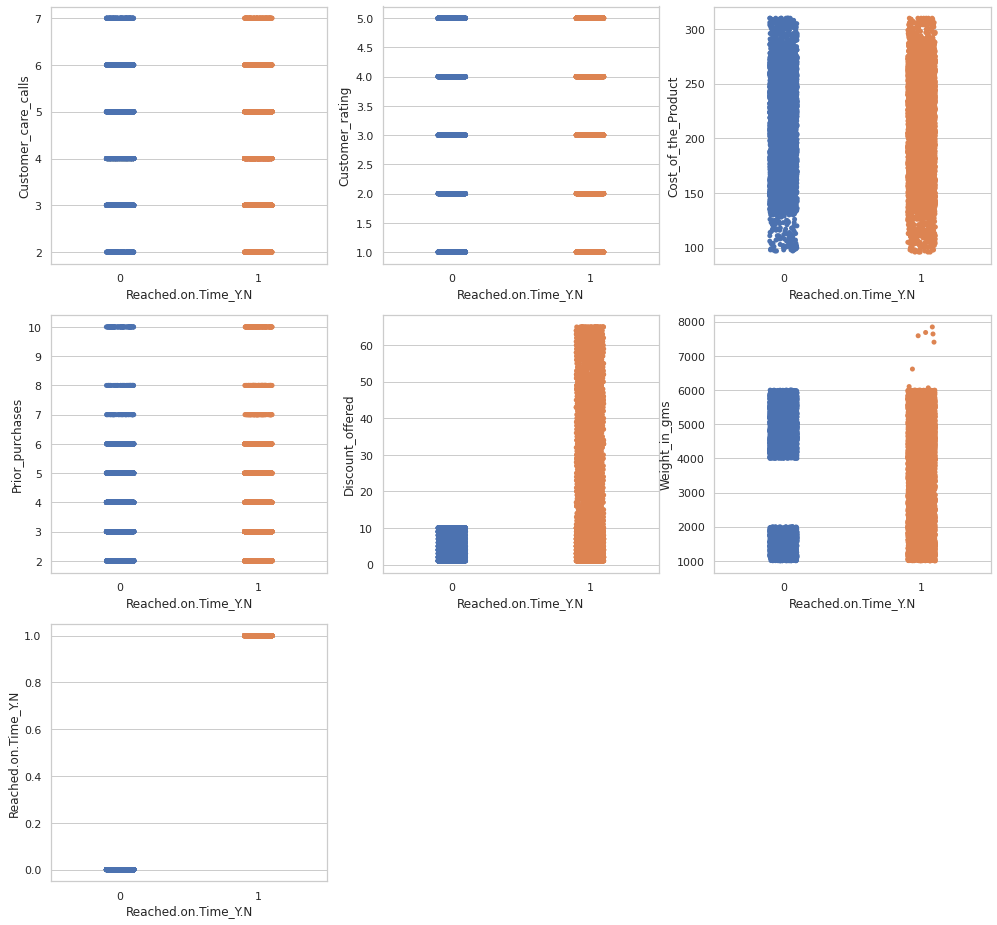

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical_a)): #setiap kolom numerik
  ax = fig.add_subplot(3,3,i+1) #set posisi catplot/stripplot pada layout
  sns.stripplot(ax=ax, data=df_analysis, x='Reached.on.Time_Y.N', y=numerical_a[i]) #gambar catplot/stripplot 

Pada category plot tersebut dapat dipahami bahwa:​
​

​
Fitur yang mempengaruhi atau memiliki pola terhadap reached on time adalah fitur (-)discount offered dan weight in grams.​


Finding/temuan:


Dapat disimpulkan dari analysis numerik diatas bahwa *feature* yang memiliki berpotensi berpengaruh terhadap estimasi pengiriman barang adalah *feature discount offered dan weight in gms* dikarenakan pada visualisasi diatas, grafik dengan feature cost of product, weight in gms dan discount offered membentuk suatu pola yang menarik terhadap estimasi pengiriman barang. Ini ditandai dengan plot dengan garis/batang cenderung terisi rapat. 

In [ ]:
df_warehouse = df.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).agg({'ID' : 'count' }).reset_index()
df_warehouse.columns = ['Warehouse_block', 'Reached.on.Time_Y.N', 'Count']
df_warehouse['Total'] = df_warehouse.groupby(['Warehouse_block'])['Count'].transform('sum')
df_warehouse['Percentage'] = round(df_warehouse['Count'] / df_warehouse['Total'] * 100, 2)
df_warehouse

,Warehouse_block,Reached.on.Time_Y.N,Count,Total,Percentage
0,A,0,758,1833,41.35
1,A,1,1075,1833,58.65
2,B,0,729,1833,39.77
3,B,1,1104,1833,60.23
4,C,0,739,1833,40.32
5,C,1,1094,1833,59.68
6,D,0,738,1834,40.24
7,D,1,1096,1834,59.76
8,F,0,1472,3666,40.15
9,F,1,2194,3666,59.85


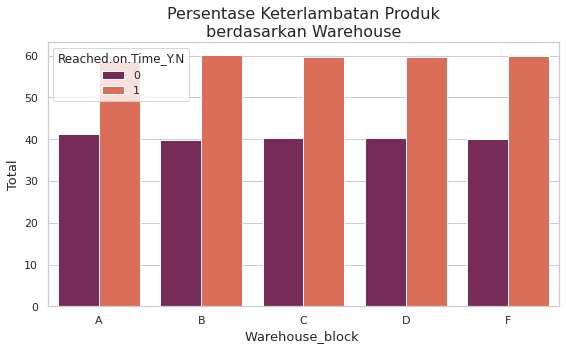

In [ ]:
fig, axes2 = plt.subplots(figsize=(8, 5))
sns.barplot(x = 'Warehouse_block', y = 'Percentage' , data = df_warehouse, hue = 'Reached.on.Time_Y.N', palette='rocket')

plt.xlabel('Warehouse_block ', fontsize=13)
plt.ylabel('Total', fontsize=13)

plt.title('Persentase Keterlambatan Produk\nberdasarkan Warehouse', fontsize=16)

#for label in axes2.containers:
    #axes2.bar_label(label)

plt.tight_layout(pad=1.0);

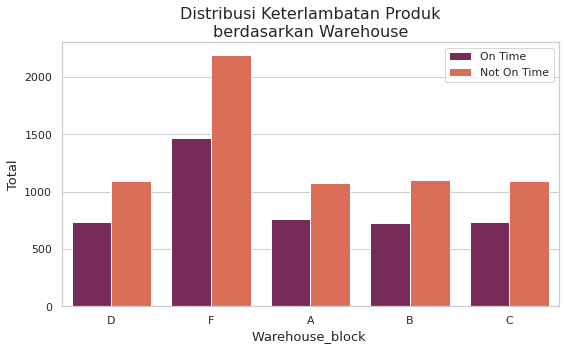

In [ ]:
fig, axes2 = plt.subplots(figsize=(8, 5))

sns.countplot(x='Warehouse_block', data=df, hue = 'Reached.on.Time_Y.N',palette='rocket');
axes2.legend(["On Time","Not On Time"],loc='upper right')
plt.xlabel('Warehouse_block ', fontsize=13)
plt.ylabel('Total', fontsize=13)

plt.title('Distribusi Keterlambatan Produk\nberdasarkan Warehouse', fontsize=16)

#for label in axes2.containers:
    #axes2.bar_label(label)

plt.tight_layout(pad=1.0);


##### Temuan
* Hanya sekitar 40% dari semua pesananterkirim tepat waktu di setiap lokasi
* Traffic pengiriman terbesar melewati gudang "F" dengan jumlah total pesanan melebihi 3500. Gudang lain dimuat secara merata dengan sedikit kurang dari 2000 pesanan per gudang.
* Walaupun gudang blok F menyimpan paling banyak kumulasi barang kategori pengiriman tidak tepat waktu, tetapi rasio antara barang kategori tepat waktu dan tidak di setiap (A,B,C,D, F) gudang sama.

#### Keterlambatan produk vs Berat produk

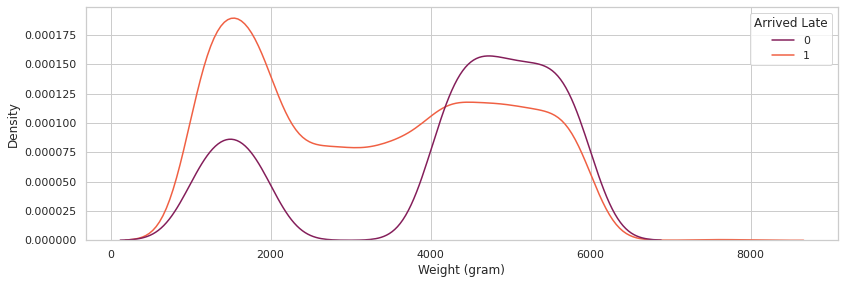

In [ ]:
weight = df[['Weight_in_gms','Reached.on.Time_Y.N']]
weight.columns = ['Weight (gram)','Arrived Late']
sns.kdeplot(x=weight['Weight (gram)'], hue = weight['Arrived Late'], palette = "rocket")

Temuan:

Barang dengan berat antara 2000-4000 gram rentan mengalami keterlambatan sedangkan barang dengan berat diatas 4000 gram cenderung tepat waktu

# Business Insights




1. Terdapat dua feature relevan yang berpengaruh dalam pembuatan model Machine Learning untuk memprediksi estimasi pengiriman barang di Tokotronic yaitu feature Discount_offered dan Weight in gms


2. Terdapat korelasi yang cukup tinggi antara diskon yang ditawarkan dan keterlambatan pengiriman. Semakin besar diskon, semakin rentan terjadi keterlambatan pengiriman terutama barang diskon diatas 10%. 

3. Feature Weight in gms cukup berpengaruh dalam penyusunan model Machine Learning untuk memprediksi estimasi pengiriman karena terdapat pola menarik yang mana barang dengan berat 2000-4000 gram rentan mengalami keterlambatan




## Visualisation Business Insight No 2

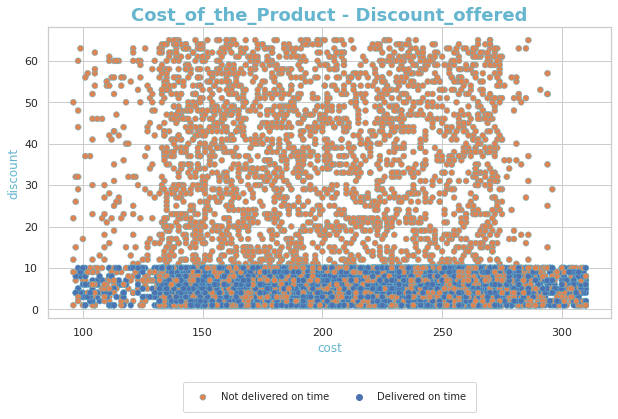

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(x="Cost_of_the_Product",y="Discount_offered",hue="Reached.on.Time_Y.N",data=df_analysis,edgecolor='C1'[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("discount",fontsize=12, fontweight='light', color='C1'[0])
plt.xlabel("cost",fontsize=12, fontweight='light', color='C1'[0])
plt.title("Cost_of_the_Product - Discount_offered", fontsize=18, fontweight='bold', color='C1'[0])
plt.show()

##Visualisation Business Insight No 3

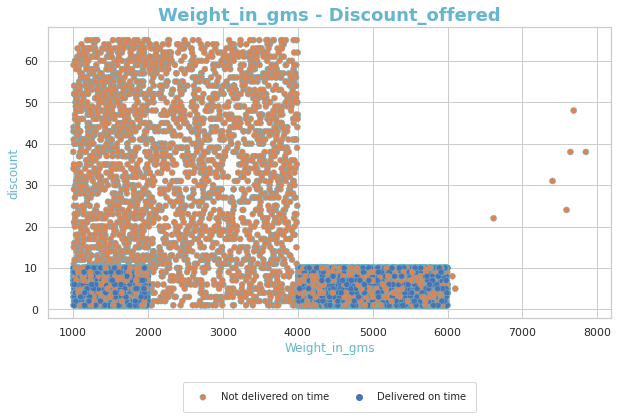

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(x="Weight_in_gms",y="Discount_offered",hue="Reached.on.Time_Y.N",data=df_analysis,edgecolor='C1'[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("discount",fontsize=12, fontweight='light', color='C1'[0])
plt.xlabel("Weight_in_gms",fontsize=12, fontweight='light', color='C1'[0])
plt.title("Weight_in_gms - Discount_offered", fontsize=18, fontweight='bold', color='C1'[0])
plt.show()

## Recommendations

**The focus of recommendation:**

**The company should restructure their system of delivery because most (60%) of  deliveries are not on time**


Recommendation to be implemented:


1. To increase delivery efficiency, the data scientist team from Tokotronic should build a ML model to predict estimation of delivery based on evaluation of the discounts offered anad weights of the goods because the current discount initiative counteracts delivery efficiency (orders being delivered not on time). Discounts as incentives trigger customers to purchase products but, if discounts are implemented poorly, it would reduce delivery efficiencies and result in delays in deliveries. Therefore, an appropriate Machice Learning model to produce a better strategy/management of discounts in handling orders is needed.



**Fokus dari Rekomendasi:**

**Perusahan Tokotronic dianjurkan untuk mengubah struktur/sistem pengiriman barang karena 60% barang tiba tidak tepat waktu**

Rekomendasi yang akan dilaksanakan:

1. Untuk meingkatkan efisiensi pengiriman barang, tim data scientis dari Tokotronik dianjurkan untuk membangun model Machine Learning untuk memprediksi estimasi pengiriman berbasarkan evaluasi pemberian diskon dan berat barang karena strategi diskon saat ini menghalangi efisiensi pengiriman barang. Maka, model Machine Learning yang menghasilkan strategi/management diskon yang lebih baik sangat dibutuhkan.

